<a href="https://colab.research.google.com/github/CurtisLuu/OIBSIP/blob/main/OIBWeek3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/ML/OIB Week3/car data.csv", encoding = 'latin-1')

data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data = data.drop(columns={"Owner"})

data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual


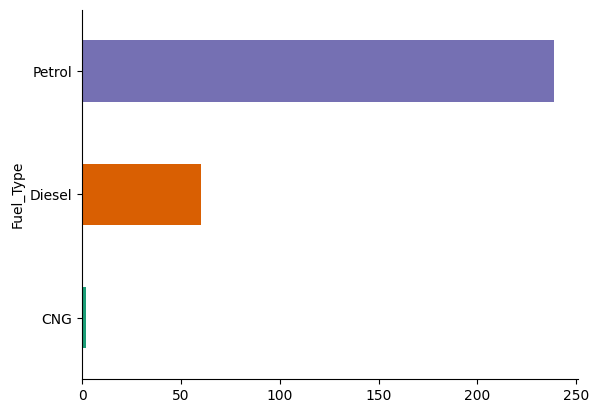

In [ ]:
# @title Fuel_Type

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Fuel_Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

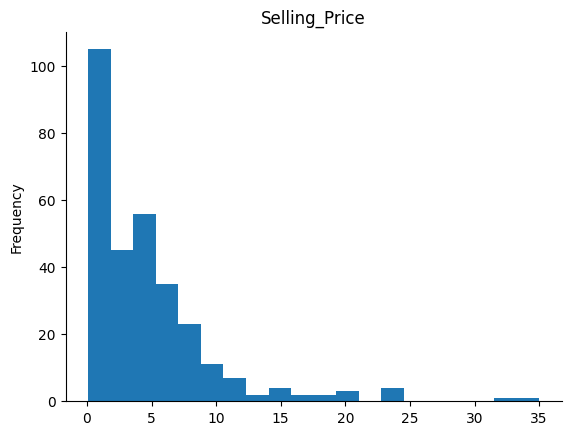

In [ ]:
# @title Selling_Price

from matplotlib import pyplot as plt
data['Selling_Price'].plot(kind='hist', bins=20, title='Selling_Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

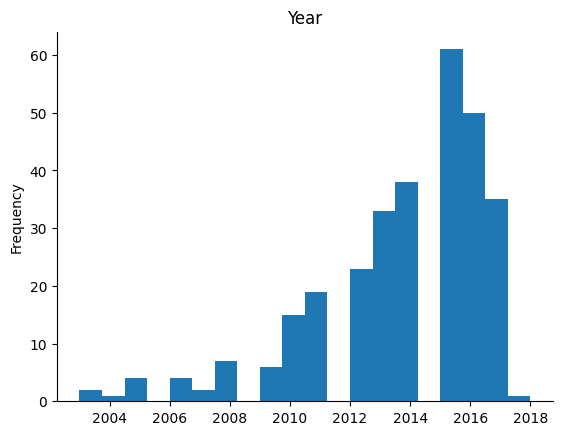

In [ ]:
# @title Year

from matplotlib import pyplot as plt
data['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Drop the Car_Name column
df = data.drop(columns=["Car_Name"])

# Define categorical and numerical columns
categorical_cols = ["Fuel_Type", "Selling_type", "Transmission"]
numerical_cols = ["Year", "Present_Price", "Driven_kms", "Owner"]

# One-Hot Encode categorical features
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  # drop_first to avoid dummy variable trap


In [11]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

# Split dataset into features (X) and target variable (y)
X = df.drop(columns=["Selling_Price"])
y = df["Selling_Price"]

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
mae

# Compute R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Compute Feature Importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importances:")
print(feature_importances)


R² Score: 0.9636
Mean Squared Error (MSE): 0.8391
Root Mean Squared Error (RMSE): 0.9160

Feature Importances:
Present_Price              0.878695
Year                       0.060977
Driven_kms                 0.039410
Transmission_Manual        0.010824
Fuel_Type_Diesel           0.003721
Selling_type_Individual    0.003494
Fuel_Type_Petrol           0.002879
dtype: float64
